# Pythonによる科学計算の基礎（NumpyとScipy）

In [113]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

In [4]:
# データの準備
# 等間隔の数字
smp_arr = np.arange(10)
print(smp_arr)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
# 元のデータ
print(smp_arr)

# 前から数字を5つ取得して、smp_arr_sliceに入れる
smp_arr_slice = smp_arr[0:5]
print(smp_arr_slice)

# smp_arr_sliceの3つめまでは10で置換
smp_arr_slice[0:3] = 10
print(smp_arr_slice)

# スライスを変更すると、オリジナルの変数の要素も変更されていることに注意
print(smp_arr)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]
[10 10 10  3  4]
[10 10 10  3  4  5  6  7  8  9]


## ブールインデックス参照

In [6]:
# オリジナルのデータを変更せずにコピーする場合は、以下のようにcopyを使う
smp_arr_copy = np.copy(smp_arr)

In [7]:
# データの準備
smp_names = np.array(['a', 'b', 'c', 'd', 'a'])
random.seed(0)
data = random.randn(5, 5)

print(smp_names)
print(data)

['a' 'b' 'c' 'd' 'a']
[[ 1.764  0.4    0.979  2.241  1.868]
 [-0.977  0.95  -0.151 -0.103  0.411]
 [ 0.144  1.454  0.761  0.122  0.444]
 [ 0.334  1.494 -0.205  0.313 -0.854]
 [-2.553  0.654  0.864 -0.742  2.27 ]]


In [8]:
# aに等しい箇所は True、そうでなければFalseになる
smp_names == 'a'

array([ True, False, False, False,  True], dtype=bool)

In [9]:
# np配列にbool値の配列を入れると、Trueに対応する箇所をするだけを抜き出せる
data[smp_names == 'a']

array([[ 1.764,  0.4  ,  0.979,  2.241,  1.868],
       [-2.553,  0.654,  0.864, -0.742,  2.27 ]])

In [10]:
cond_data = np.array([True, True, False, False, False])
x_arr = np.array([1,2,3,4,5])
y_arr = np.array([6,7,8,9,10])、
print(np.where(cond_data, x_arr, y_arr))

[ 1  2  8  9 10]


In [11]:
# 練習問題1
data[smp_names == 'b']

array([[-0.977,  0.95 , -0.151, -0.103,  0.411]])

In [12]:
# 練習問題2
data[smp_names != 'c']

array([[ 1.764,  0.4  ,  0.979,  2.241,  1.868],
       [-0.977,  0.95 , -0.151, -0.103,  0.411],
       [ 0.334,  1.494, -0.205,  0.313, -0.854],
       [-2.553,  0.654,  0.864, -0.742,  2.27 ]])

In [13]:
# 練習問題3
bools = np.array([False, False, True, True, False])
print(np.where(bools, x_arr, y_arr))

[ 6  7  3  4 10]


## 3.2.2 Numpyの演算処理

### 重複の削除

In [16]:
# 重複あり
print(cond_data)
# 重複削除
print(np.unique(cond_data))

[ True  True False False False]
[False  True]


In [18]:
smp_data = np.arange(10)
print("すべての要素に平方根：", np.sqrt(smp_data))
print("すべての要素にExp：", np.exp(smp_data))

すべての要素に平方根： [ 0.     1.     1.414  1.732  2.     2.236  2.449  2.646  2.828  3.   ]
すべての要素にExp： [  1.000e+00   2.718e+00   7.389e+00   2.009e+01   5.460e+01   1.484e+02
   4.034e+02   1.097e+03   2.981e+03   8.103e+03]


### 平均・最大値・合計の計算（行列）

In [21]:
smp_matrix_1 = np.arange(9).reshape(3,3)
print(smp_matrix_1)

print("平均：",smp_matrix_1.mean())
print("最大値：",smp_matrix_1.max())
print("合計：",smp_matrix_1.sum())

# 行列の指定
print("行の合計：", smp_matrix_1.sum(axis=1))
print("列の合計：", smp_matrix_1.sum(axis=0))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
平均： 4.0
最大値： 8
合計： 36
行の合計： [ 3 12 21]
列の合計： [ 9 12 15]


### 真偽値の配列関数（any、all）

In [24]:
print("TureがひとつでもあればTrue：", cond_data.any())
print("すべてTrueであればTrue：", cond_data.all())
print("5より大きい数字がいくつあるか", (smp_matrix_1>5).sum())

TureがひとつでもあればTrue： True
すべてTrueであればTrue： False
5より大きい数字がいくつあるか 3


### 行列の対角成分の表示と和

In [26]:
# 行列計算
print("対角成分：", np.diag(smp_matrix_1))
print("対角成分の和", np.trace(smp_matrix_1))

対角成分： [0 4 8]
対角成分の和 12


### 練習問題

In [31]:
smp_matrix_2 = np.arange(16).reshape(4,4)
smp_matrix_2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

#### 練習問題1
上記のデータsmp_matrix_2に対して、すべての要素の平方根を計算した行列を表示してください。

In [32]:
print(np.sqrt(smp_matrix_2))

[[ 0.     1.     1.414  1.732]
 [ 2.     2.236  2.449  2.646]
 [ 2.828  3.     3.162  3.317]
 [ 3.464  3.606  3.742  3.873]]


#### 練習問題2
上記のデータsmp_matrix_2の最大値、最小値、合計値、平均値を求めてください。

In [34]:
print(smp_matrix_2.max(), smp_matrix_2.min(), smp_matrix_2.sum(), smp_matrix_2.mean())

15 0 120 7.5


####  練習問題3
上記のデータsmp_matrix_2の対角成分の和を求めてください。

In [35]:
print(np.trace(smp_matrix_2))

30


## 3.2.3 配列操作とブロードキャスト

## reshapeによる行列の次元変更

In [41]:
smp_arr_1 = np.arange(10)
smp_arr_2 = smp_arr_1.reshape(2,5)
print(smp_arr_2)
print(smp_arr_2.reshape(5,2))

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


## データの結合
###  concatenate
axis=0で行方向、axis=1で列方向

In [50]:
# データの準備
smp_arr_3 = np.array([[1,2,3],[4,5,6]])
smp_arr_4 = np.array([[7,8,9],[10,11,12]])

# 行方向に結合
v = np.concatenate([smp_arr_3, smp_arr_4], axis=0)
print("行方向に結合\n",v)

# 列方向に結合
h = np.concatenate([smp_arr_3, smp_arr_4], axis=1)
print("列方向に結合\n",h)

行方向に結合
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
列方向に結合
 [[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


### vstack
行方向の結合

In [54]:
np.vstack((smp_arr_3, smp_arr_4))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

### hstack
列方向の結合

In [53]:
np.hstack((smp_arr_3, smp_arr_4))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

## 配列の分割
[参考URL](https://docs.scipy.org/doc/numpy/reference/generated/numpy.split.html)

In [67]:
# データの用意
smp_arr_vstack = np.vstack((smp_arr_3, smp_arr_4))
# 分割（[1,3]は、上記参考URLのindice_or_sections を参照）
first, second, third = np.split(smp_arr_vstack, [1,3])

In [68]:
# 元のデータ
smp_arr_vstack

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [69]:
# 分割後1
first

array([[1, 2, 3]])

In [70]:
# 分割後2
second

array([[4, 5, 6],
       [7, 8, 9]])

In [71]:
# 分割後3
third

array([[10, 11, 12]])

In [99]:
# repeatで各要素を繰り返す
first.repeat(5)

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])

## ブロードキャスト
配列の大きさが異なっていれば、自動的に要素をコピーして大きさを揃える機能

In [101]:
# データの準備
sample_array = np.arange(10)
print(sample_array)

[0 1 2 3 4 5 6 7 8 9]


In [102]:
# 上記配列に3を足す計算
sample_array + 3

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

要素をコピーして大きさを揃えて、配列の全ての要素に3を加えているのがわかります。

## 練習問題

### 練習問題1
次の2つの配列に対して、縦に結合してみましょう。

In [104]:
# データの準備
smp_arr_1 = np.arange(12).reshape(3,4)
smp_arr_2 = np.arange(12).reshape(3,4)

In [107]:
np.vstack([smp_arr_1, smp_arr_2])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### 練習問題2
上記2つの配列に対して、横に結合してみましょう。

In [108]:
np.hstack([smp_arr_1, smp_arr_2])

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

### 練習問題3
普通の以下のリストの各要素に3を加えるためにはどうすればよいでしょうか。numpyのブロードキャスト機能を使ってください

In [110]:
sample_list = [1,2,3,4,5]

In [111]:
np.array(sample_list)+3

array([4, 5, 6, 7, 8])

## 3.3 Scipy

## 3.3.1 補間

In [115]:
x = np.linspace(1,10,num=11,endpoint=True)
y = np.cos(-x**2/5.0)
print(x)
print(y)

[  1.    1.9   2.8   3.7   4.6   5.5   6.4   7.3   8.2   9.1  10. ]
[ 0.98   0.75   0.003 -0.92  -0.462  0.973 -0.332 -0.331  0.636 -0.657
  0.408]


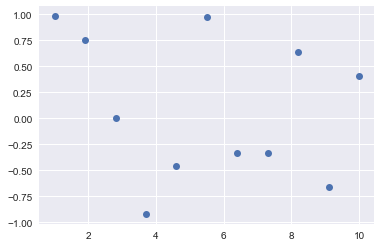

In [116]:
plt.plot(x,y,'o')
plt.grid(True)

xが4.5など、実点と実点の間にあるxに対応するyはどのような値になるのでしょうか？これを考えるのが補間計算です。scipyでは、1次元データに対する補間はinterp1dが用意されており、以下のように記述します。

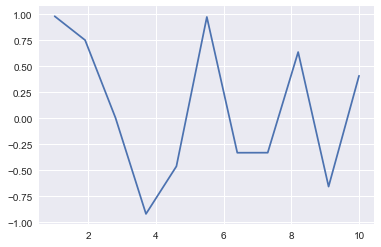

In [118]:
from scipy import interpolate
# 線形補間
f = interpolate.interp1d(x, y, 'linear')
plt.plot(x, f(x), '-')
plt.grid(True)

In [126]:
# スプライン3次補間も加えて、まとめてみる、
f2 = interpolate.interp1d(x, y,'cubic')

#曲線を出すために、xの値を細かくする。
xnew = np.linspace(0, 10, num=30, endpoint=True)

print(f(xnew))

# グラフ化
#plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')

# 凡例
#plt.legend(['data', 'linear', 'cubic'], loc='best')
#plt.grid(True)

ValueError: A value in x_new is below the interpolation range.

c:\users\kecy\machine_learning\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


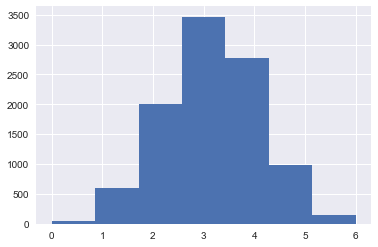

In [98]:
import random
import matplotlib.pyplot as plt
def shuffle():
    iro = sum(random.sample([1]*18+[0]*16,6))
    suji = 6-iro
    return iro
pool = []
for i in range(10000):
    pool.append(shuffle())

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(pool, bins=7)
fig.show()